In [7]:
%pip install -q swig
%pip install -q "gymnasium[box2d]"

from config import DQNConfig
from train import train_loop
from plot import plot_avg_return
from evaluation import evaluate_policy, show_metrics

import warnings
warnings.filterwarnings("ignore", message="pkg_resources is deprecated")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Episode:    1 | Global Step:      110 | The latest 100 avg return:   -158.9 | avg length:  110.0
Episode:  200 | Global Step:   18,622 | The latest 100 avg return:   -103.5 | avg length:   96.2
Episode:  400 | Global Step:   39,162 | The latest 100 avg return:    -56.6 | avg length:  103.1
Episode:  600 | Global Step:   85,222 | The latest 100 avg return:    -21.8 | avg length:  341.9
Episode:  800 | Global Step:  228,465 | The latest 100 avg return:    164.9 | avg length:  579.6
Episode: 1000 | Global Step:  335,611 | The latest 100 avg return:    234.7 | avg length:  463.6
Episode: 1200 | Global Step:  413,837 | The latest 100 avg return:    252.4 | avg length:  337.9
Episode: 1400 | Global Step:  481,902 | The latest 100 avg return:    242.2 | avg length:  342.3


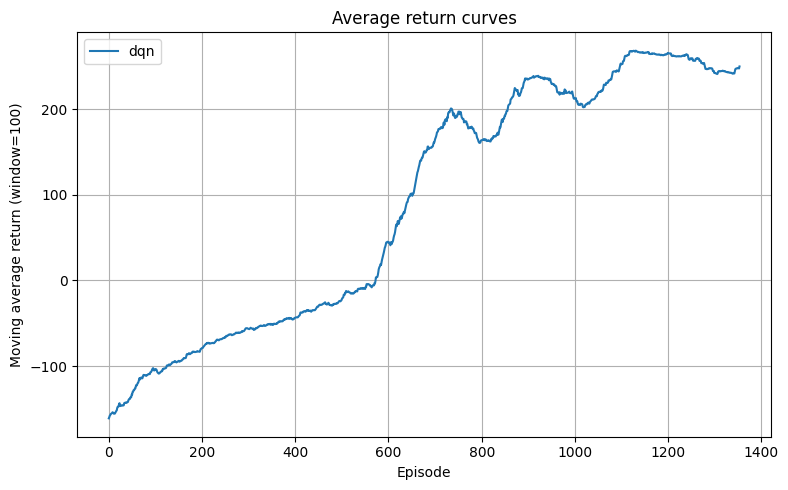

Vanilla DQN policy metrics:
num_episodes: 100
mean_return: 239.09503173828125
std_return: 43.1534538269043
min_return: 16.533586502075195
max_return: 313.4890441894531
solved_rate: 0.93
success_rate: 0.92
crash_rate: 0.02
timeout_rate: 0.06
other_terminal_rate: 0.0
mean_episode_length: 373.98
mean_main_engine_usage: 82.71
mean_side_engine_usage: 212.86
num_success_episodes: 92
mean_final_abs_x_success: 0.03276590630412102
mean_final_abs_vy_success: 0.0
mean_final_abs_angle_success: 0.005415920168161392


In [8]:
config = DQNConfig()

result_dqn, agent_dqn = train_loop(config, variant='dqn', output_mode="format_print")

plot_avg_return([result_dqn])

metrics_dqn = evaluate_policy(agent_dqn.select_deterministic_action, num_episodes=100, seed=0)

show_metrics("Vanilla DQN", metrics_dqn)

Episode:    1 | Global Step:      110 | The latest 100 avg return:   -158.9 | avg length:  110.0
Episode:  200 | Global Step:   19,266 | The latest 100 avg return:   -109.3 | avg length:   96.1
Episode:  400 | Global Step:   38,746 | The latest 100 avg return:    -72.1 | avg length:   97.1
Episode:  600 | Global Step:   96,181 | The latest 100 avg return:    -66.5 | avg length:  459.8
Episode:  800 | Global Step:  269,099 | The latest 100 avg return:    -20.1 | avg length:  829.0
Episode: 1000 | Global Step:  374,438 | The latest 100 avg return:    151.2 | avg length:  532.0
Episode: 1200 | Global Step:  491,356 | The latest 100 avg return:    128.0 | avg length:  447.9


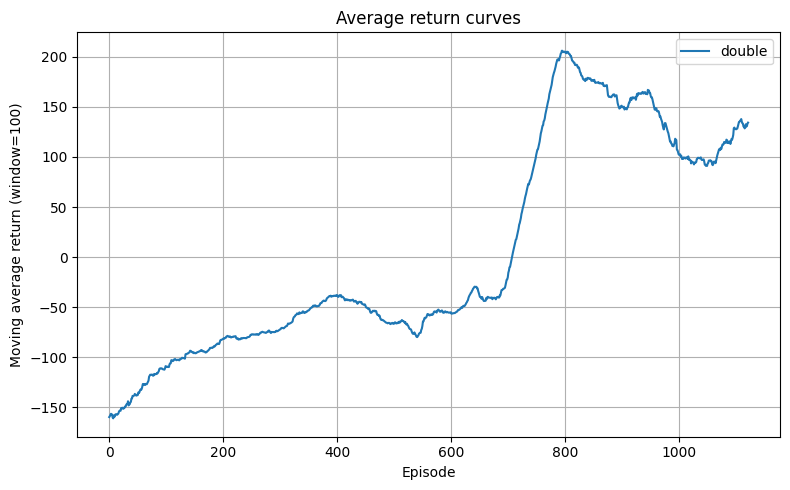

Double DQN policy metrics:
num_episodes: 100
mean_return: 246.71127319335938
std_return: 54.901039123535156
min_return: -53.841121673583984
max_return: 306.1969909667969
solved_rate: 0.94
success_rate: 0.96
crash_rate: 0.04
timeout_rate: 0.0
other_terminal_rate: 0.0
mean_episode_length: 356.88
mean_main_engine_usage: 42.61
mean_side_engine_usage: 218.15
num_success_episodes: 96
mean_final_abs_x_success: 0.04764270782470703
mean_final_abs_vy_success: 0.0
mean_final_abs_angle_success: 0.003790883347392082


In [12]:
config = DQNConfig(LR=3e-4, HIDDEN_SIZES=(32, 32), TARGET_UPDATE_FREQ=500)

result_double, agent_double = train_loop(config, variant='double', output_mode="format_print")

plot_avg_return([result_double])

metrics_double = evaluate_policy(agent_double.select_deterministic_action, num_episodes=100, seed=0)

show_metrics("Double DQN", metrics_double)

Episode:    1 | Global Step:      110 | The latest 100 avg return:   -158.9 | avg length:  110.0
Episode:  200 | Global Step:   18,706 | The latest 100 avg return:   -130.8 | avg length:   95.6
Episode:  400 | Global Step:   40,078 | The latest 100 avg return:    -68.1 | avg length:  106.4
Episode:  600 | Global Step:  112,702 | The latest 100 avg return:    -53.4 | avg length:  600.2
Episode:  800 | Global Step:  227,363 | The latest 100 avg return:    179.3 | avg length:  360.0
Episode: 1000 | Global Step:  295,135 | The latest 100 avg return:    158.0 | avg length:  296.0
Episode: 1200 | Global Step:  341,759 | The latest 100 avg return:     82.0 | avg length:  175.0
Episode: 1400 | Global Step:  386,123 | The latest 100 avg return:    232.4 | avg length:  274.0
Episode: 1600 | Global Step:  430,037 | The latest 100 avg return:    131.4 | avg length:  187.8
Episode: 1800 | Global Step:  467,074 | The latest 100 avg return:    195.2 | avg length:  221.3


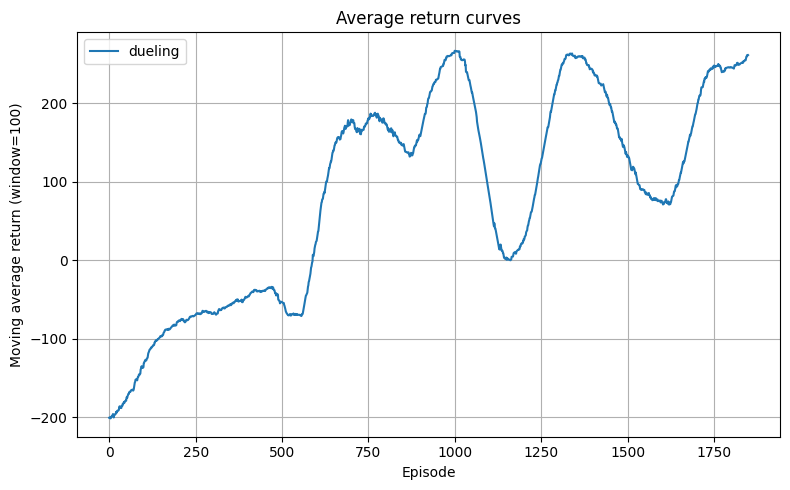

Dueling DQN policy metrics:
num_episodes: 100
mean_return: 267.8463134765625
std_return: 51.62117385864258
min_return: 6.941497802734375
max_return: 316.4346618652344
solved_rate: 0.96
success_rate: 0.96
crash_rate: 0.04
timeout_rate: 0.0
other_terminal_rate: 0.0
mean_episode_length: 202.67
mean_main_engine_usage: 17.97
mean_side_engine_usage: 105.93
num_success_episodes: 96
mean_final_abs_x_success: 0.0595225989818573
mean_final_abs_vy_success: 0.0
mean_final_abs_angle_success: 0.002153616864234209


In [10]:
config = DQNConfig(LR=3e-4, TARGET_UPDATE_FREQ=500, TRAIN_START_SIZE = 10_000)

result_dueling, agent_dueling = train_loop(config, variant='dueling', output_mode="format_print")

plot_avg_return([result_dueling])

metrics_dueling = evaluate_policy(agent_dueling.select_deterministic_action, num_episodes=100, seed=0)

show_metrics("Dueling DQN", metrics_dueling)

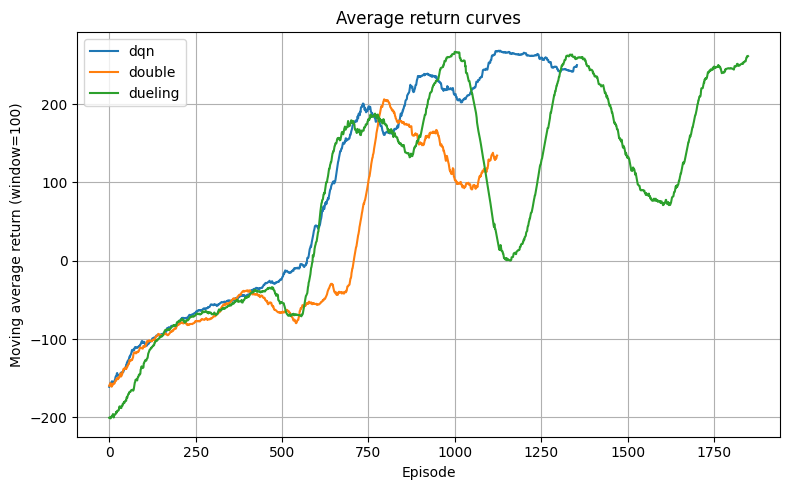

In [13]:
plot_avg_return([result_dqn, result_double, result_dueling])